In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score

import re
import string
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer

# Data Importing and Preprocessing

In [7]:
df = pd.read_csv('Dataset/combined data.csv') # Load the dataset
df.shape

(17533, 15)

Dataset as total of 17533 rows and 15 columns

In [8]:
df.head()

,uniq_id,crawl_timestamp,product_url,product_name,product_category_tree,pid,retail_price,discounted_price,image,is_FK_Advantage_product,description,product_rating,overall_rating,brand,product_specifications
0,c2d766ca982eca8304150849735ffef9,2016-03-25 22:59:23 +0000,http://www.flipkart.com/alisha-solid-women-s-c...,Alisha Solid Women's Cycling Shorts,Clothing,SRTEH2FF9KEDEFGF,999.0,379.0,"[""http://img5a.flixcart.com/image/short/u/4/a/...",False,Key Features of Alisha Solid Women's Cycling S...,No rating available,No rating available,Alisha,"{""product_specification""=>[{""key""=>""Number of ..."
1,f449ec65dcbc041b6ae5e6a32717d01b,2016-03-25 22:59:23 +0000,http://www.flipkart.com/aw-bellies/p/itmeh4grg...,AW Bellies,Footwear,SHOEH4GRSUBJGZXE,999.0,499.0,"[""http://img5a.flixcart.com/image/shoe/7/z/z/r...",False,Key Features of AW Bellies Sandals Wedges Heel...,No rating available,No rating available,AW,"{""product_specification""=>[{""key""=>""Ideal For""..."
2,0973b37acd0c664e3de26e97e5571454,2016-03-25 22:59:23 +0000,http://www.flipkart.com/alisha-solid-women-s-c...,Alisha Solid Women's Cycling Shorts,Clothing,SRTEH2F6HUZMQ6SJ,699.0,267.0,"[""http://img5a.flixcart.com/image/short/6/2/h/...",False,Key Features of Alisha Solid Women's Cycling S...,No rating available,No rating available,Alisha,"{""product_specification""=>[{""key""=>""Number of ..."
3,ce5a6818f7707e2cb61fdcdbba61f5ad,2016-03-25 22:59:23 +0000,http://www.flipkart.com/alisha-solid-women-s-c...,Alisha Solid Women's Cycling Shorts,Clothing,SRTEH2FVVKRBAXHB,1199.0,479.0,"[""http://img6a.flixcart.com/image/short/p/j/z/...",False,Key Features of Alisha Solid Women's Cycling S...,No rating available,No rating available,Alisha,"{""product_specification""=>[{""key""=>""Number of ..."
4,29c8d290caa451f97b1c32df64477a2c,2016-03-25 22:59:23 +0000,http://www.flipkart.com/dilli-bazaaar-bellies-...,"dilli bazaaar Bellies, Corporate Casuals, Casuals",Footwear,SHOEH3DZBFR88SCK,699.0,349.0,"[""http://img6a.flixcart.com/image/shoe/b/p/n/p...",False,"Key Features of dilli bazaaar Bellies, Corpora...",No rating available,No rating available,dilli bazaaar,"{""product_specification""=>[{""key""=>""Occasion"",..."


## Checking and handling missing data, outliers, and data inconsistencies

In [9]:
df.isnull().sum() # checking for missing value

,0
uniq_id,0
crawl_timestamp,0
product_url,0
product_name,0
product_category_tree,0
pid,0
retail_price,61
discounted_price,61
image,3
is_FK_Advantage_product,0


* Since we are using only description as input variable for predicting product category
* We decided to drop null values because descripton column as only 1 null value

In [10]:
cleaned_df = df.dropna(subset=['description']) # Dropping null value

In [11]:
cleaned_df['description'].isnull().sum()

0

* Description null value droped successfully

In [12]:
cleaned_df.duplicated().sum()

0

* Dataset as zero duplicate values

Now our data ready for analysis

# Exploratory Data Analysis

In [13]:
cleaned_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 17532 entries, 0 to 17532
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   uniq_id                  17532 non-null  object 
 1   crawl_timestamp          17532 non-null  object 
 2   product_url              17532 non-null  object 
 3   product_name             17532 non-null  object 
 4   product_category_tree    17532 non-null  object 
 5   pid                      17532 non-null  object 
 6   retail_price             17471 non-null  float64
 7   discounted_price         17471 non-null  float64
 8   image                    17529 non-null  object 
 9   is_FK_Advantage_product  17532 non-null  bool   
 10  description              17532 non-null  object 
 11  product_rating           17532 non-null  object 
 12  overall_rating           17532 non-null  object 
 13  brand                    12301 non-null  object 
 14  product_specifications   17

* We observe only two numeric columns and rest categorical columns

In [14]:
cleaned_df.describe()

,retail_price,discounted_price
count,17471.000000,17471.000000
mean,2949.857192,1932.011505
std,8547.246463,7172.269552
min,35.000000,35.000000
25%,699.000000,350.000000
50%,1050.000000,549.000000
75%,1999.000000,999.000000
max,571230.000000,571230.000000


## Univariate Analysis

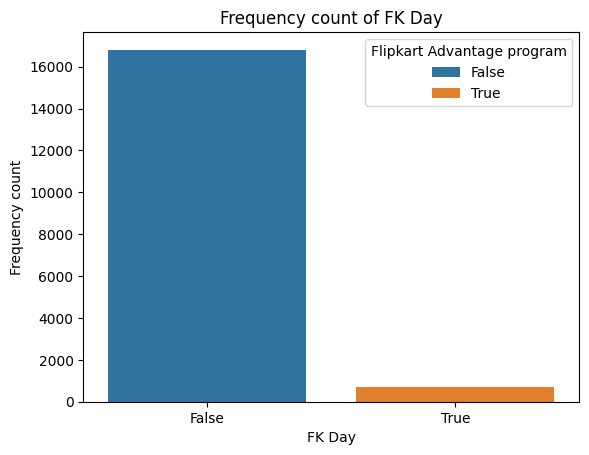

In [15]:
sns.countplot(data = cleaned_df, x = 'is_FK_Advantage_product', hue = 'is_FK_Advantage_product')
plt.title('Frequency count of FK Day')
plt.xlabel('FK Day')
plt.ylabel('Frequency count')
plt.legend(title = 'Flipkart Advantage program')
plt.show()

## Biveriate analysis

In [16]:
# Frequency count of product category

category_counts = cleaned_df['product_category_tree'].value_counts()
category_counts

,count
product_category_tree,
Clothing,6197
Jewellery,3531
Footwear,1227
Mobiles & Accessories,1099
Automotive,1012
Home Decor & Festive Needs,929
Kitchen & Dining,647
Computers,578
Watches,530


* Problem: The products category has a significant imbalance in the data.
* Solution: We will use Stratify target distribution and SMOTE (Synthetic Minority Over-sampling Technique) algorithm to balance the data.

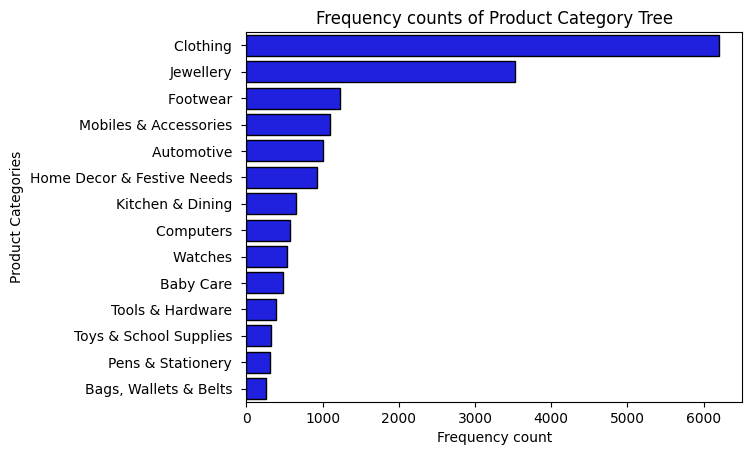

In [17]:
# Barplot of frequency count of category

sns.barplot(y = category_counts.keys(), x = category_counts.values, color = 'blue', edgecolor = 'black')
plt.title('Frequency counts of Product Category Tree')
plt.xlabel('Frequency count')
plt.ylabel('Product Categories')
plt.show()

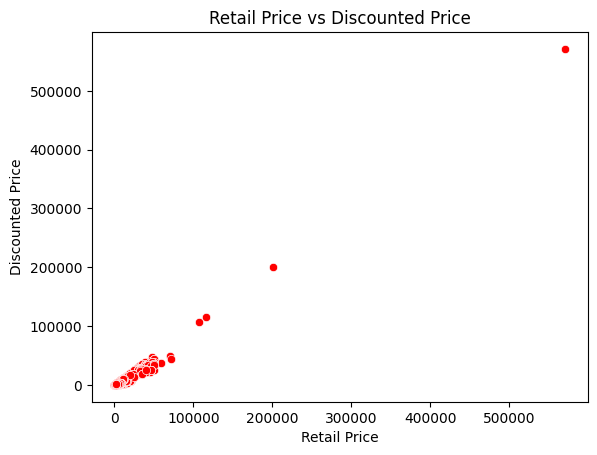

In [18]:
# Retail price vs discounted price
sns.scatterplot(data = cleaned_df, x = 'retail_price', y = 'discounted_price', color = 'red')
plt.title('Retail Price vs Discounted Price')
plt.xlabel('Retail Price')
plt.ylabel('Discounted Price')
plt.show()

* We observe linear positive linear relationship between retaile and discont price
* Higher the retail price, Higher the discount price

In [19]:
# Average reatil price of product category

avg_retail_price = cleaned_df.groupby('product_category_tree')['retail_price'].mean().sort_values(ascending = False)

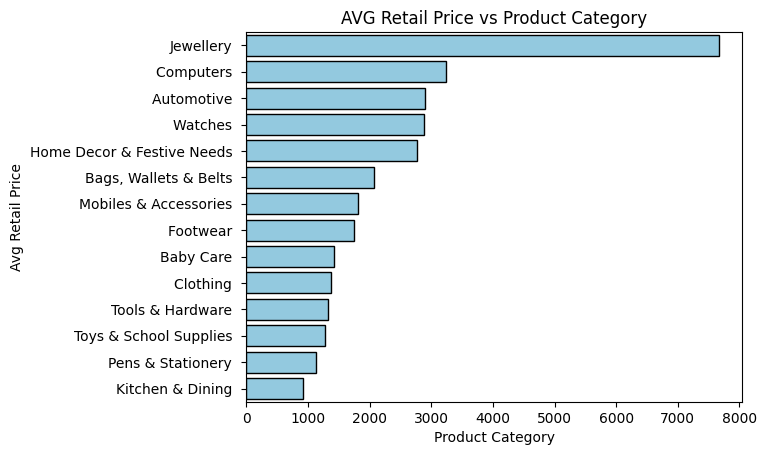

In [20]:
#Avg retail price vs Product category

sns.barplot(y =avg_retail_price.index , x = avg_retail_price.values, color = 'skyblue', edgecolor = 'black')
plt.title('AVG Retail Price vs Product Category')
plt.xlabel('Product Category')
plt.ylabel('Avg Retail Price')
plt.show()

* We observe Jewellery as highest average retail price than other categories
* Since we know there is positive linear relation between retail and discount
* We can say jewellery as highest avg discount price than other categories

In [21]:
avg_discount_price = cleaned_df.groupby('product_category_tree')['discounted_price'].mean().sort_values(ascending = False)

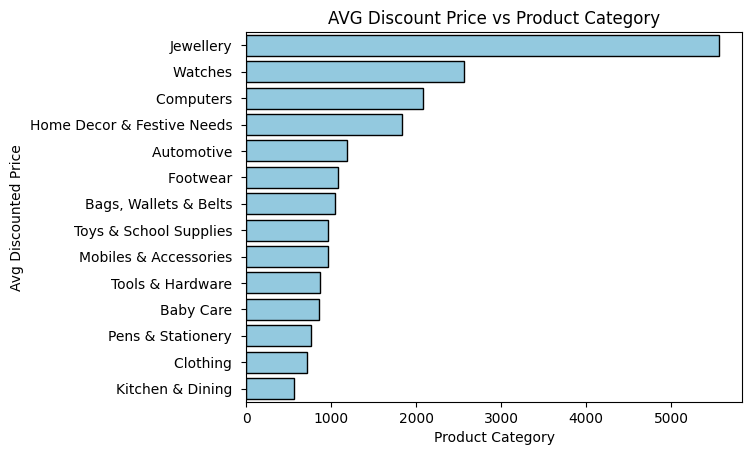

In [22]:
sns.barplot(y =avg_discount_price.index , x = avg_discount_price.values, color = 'skyblue', edgecolor = 'black')
plt.title('AVG Discount Price vs Product Category')
plt.xlabel('Product Category')
plt.ylabel('Avg Discounted Price')
plt.show()

* As we already said jewellary as highest avg discount price

* We observe majority of categories are not from Flipkart Advantage program
* Flipkart Advantage program is premium service under which ensures faster delivery, better packaging, and superior customer service

# Feature engineering

### Splitting data into train and test

In [23]:
X = cleaned_df['description'] # Input feature
y = cleaned_df['product_category_tree'] # Traget feature

In [24]:
# Splitting into train test data with Stratified distrubution

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

### Target feature Encoding using Label encoder

In [25]:
# Encoding target feature
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

### Test Preprocessing for Word Embedding

In [26]:
# Download NLTK resources
nltk.download('stopwords')
nltk.download('wordnet')

# Initialize lemmatizer and stopwords
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


### Text preprocessing function

In [27]:
def preprocess_text(text):
    # 1. Converting to Lowercase
    text = text.lower()

    # 2. Remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))

    # 3. Remove numbers
    text = re.sub(r'\d+', '', text)

    # 4. Tokenize and remove stopwords
    words = text.split()
    words = [word for word in words if word not in stop_words]

    # 5. Lemmatize words
    words = [lemmatizer.lemmatize(word) for word in words]

    # 6. Join words back into a single string
    text = ' '.join(words)
    return text

# Apply preprocessing to the descriptions in X_train and X_test

X_train_preprocessed = [preprocess_text(desc) for desc in X_train]
X_test_preprocessed = [preprocess_text(desc) for desc in X_test]

### Using Frquency approach (TF-IDF) for Word Embedding

* Term Frequency (TF)- Inverse Document Frequency (IDF)

In [28]:
# Convert a collection of raw text documents into a matrix of TF-IDF features

vectorizer = TfidfVectorizer(max_features=5000)

X_train_tfidf = vectorizer.fit_transform(X_train_preprocessed)
X_test_tfidf = vectorizer.transform(X_test_preprocessed)

In [29]:
# Oversampling minority classes to handle class Imbalance

smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train_tfidf, y_train_encoded)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/_tags.py:354: FutureWarning: The SMOTE or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.
  warnings.warn(


* **We successfully preprocessed text data**
* **Converted preprocessed natural text into vector data for machine understanding using frequency based word embedding**
* **Oversampled data to handled the class imbalance**

##  **Now our data is ready for training and test**

# Training Baseline Model

In [30]:
# Train use LogisticRegression as Baseline model

model = LogisticRegression()
model.fit(X_train_smote, y_train_smote)

LogisticRegression()

In [31]:
# Predicting on test data

from sklearn.metrics import f1_score, accuracy_score
y_pred = model.predict(X_test_tfidf)

# Calulating metrics scores

print('Baseline Model(Logistic Regression) test accuracy', accuracy_score(y_test_encoded, y_pred))
print('Baseline Model(Logistic Regression) test f1 score', f1_score(y_test_encoded, y_pred, average = 'weighted'))
print('\n')
print('Classification Report: \n', classification_report(y_test_encoded, y_pred))

Baseline Model(Logistic Regression) test accuracy 0.9804182509505703
Baseline Model(Logistic Regression) test f1 score 0.980520693679888


Classification Report: 
               precision    recall  f1-score   support

           0       0.99      0.98      0.98       304
           1       0.89      0.92      0.90       145
           2       0.94      0.97      0.96        80
           3       0.99      0.99      0.99      1859
           4       0.93      0.95      0.94       173
           5       1.00      0.99      0.99       368
           6       0.97      0.97      0.97       279
           7       1.00      1.00      1.00      1059
           8       0.97      0.97      0.97       194
           9       0.97      0.99      0.98       330
          10       0.81      0.93      0.87        94
          11       1.00      0.94      0.97       117
          12       0.94      0.84      0.89        99
          13       1.00      0.97      0.98       159

    accuracy            

* **We have achieved an impressive 98% accuracy and F1-score**

# Train Use different models

In [ ]:
import pandas as pd
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import RidgeClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier


# Classifiers
names = [
    "Logistic Regression",
    "KNN Classifier",
    "Decision Tree",
    "SVM",
    "Random Forest"
]

models = [
    LogisticRegression(),
    KNeighborsClassifier(),
    DecisionTreeClassifier(),
    svm.SVC(),
    RandomForestClassifier()
]

results = []
for name, model in zip(names, models):
    # Train the model
    model.fit(X_train_smote, y_train_smote)

    # Make predictions on train and test data
    y_train_pred = model.predict(X_train_smote)
    y_test_pred = model.predict(X_test_tfidf)

    # Calculate accuracy scores
    train_accuracy = accuracy_score(y_train_smote, y_train_pred)
    test_accuracy = accuracy_score(y_test_encoded, y_test_pred)

    results.append([name, train_accuracy, test_accuracy])



In [ ]:
# Create a DataFrame from the results
results_df = pd.DataFrame(results, columns=["Model", "Train Accuracy", "Test Accuracy"]).sort_values(by = 'Test Accuracy', ascending = False)
results_df

,Model,Train Accuracy,Test Accuracy
3,SVM,0.997843,0.981939
0,Logistic Regression,0.995258,0.980418
4,Random Forest,0.999029,0.978517
2,Decision Tree,0.999029,0.962928
1,KNN Classifier,0.995011,0.951141


* **Support vector (SVC) has given the highest 98% accuracy score amoung other models**

* **Since we have achieved 98%, So we are not going for hyperparameter tuning and deep learning**

# **Final Model**

### Cross-valdiation

In [ ]:
from sklearn.model_selection import cross_val_score

# Evaluate the best model using cross-validation
cv_scores = cross_val_score(best_model, X_train_smote, y_train_smote, cv=5, scoring = 'accuracy')

print("Cross-validation scores:", cv_scores)
print("Mean cross-validation score:", cv_scores.mean())

Cross-validation scores: [0.99514283 0.99654236 0.9966244  0.99588342 0.99571876]
Mean cross-validation score: 0.9959823532819077


### Final Combine Model

In [ ]:

from sklearn.model_selection import cross_val_score
from sklearn.ensemble import VotingClassifier

# Assuming X_train_smote, y_train_smote, X_test_tfidf, and y_test_encoded are defined as in your original code

# Define the individual models
svc_model = SVC(probability=True) # probability=True is required for soft voting
logreg_model = LogisticRegression()
rf_model = RandomForestClassifier()

# Create a VotingClassifier
voting_model = VotingClassifier(estimators=[('svc', svc_model), ('lr', logreg_model), ('rf', rf_model)], voting='soft')

# Train the combined model
voting_model.fit(X_train_smote, y_train_smote)

# Make predictions
y_pred = voting_model.predict(X_test_tfidf)

Combined Model (SVC and LogisticRegression and RandomForest) test accuracy:  0.9844106463878327
Combined Model (SVC and LogisticRegression and RandomForest) test f1 score:  0.9842792669222322


Classification Report: 
               precision    recall  f1-score   support

           0       0.99      0.99      0.99       304
           1       0.94      0.90      0.92       145
           2       0.96      0.96      0.96        80
           3       0.99      1.00      0.99      1859
           4       0.98      0.94      0.96       173
           5       1.00      0.99      0.99       368
           6       0.97      0.99      0.98       279
           7       1.00      1.00      1.00      1059
           8       0.97      0.98      0.98       194
           9       0.98      1.00      0.99       330
          10       0.90      0.89      0.90        94
          11       1.00      0.94      0.97       117
          12       0.94      0.88      0.91        99
          13       1.00 

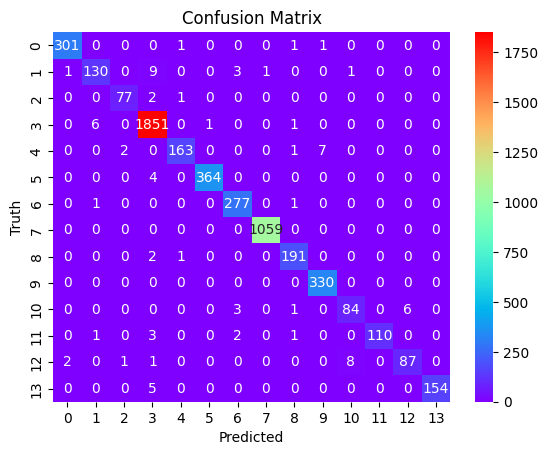

In [47]:
# Evaluate the model
from sklearn.metrics import confusion_matrix
print('Combined Model (SVC and LogisticRegression and RandomForest) test accuracy: ', accuracy_score(y_test_encoded, y_pred))
print('Combined Model (SVC and LogisticRegression and RandomForest) test f1 score: ', f1_score(y_test_encoded, y_pred, average='weighted'))
print('\n')
print('Classification Report: \n', classification_report(y_test_encoded, y_pred))

cm = confusion_matrix(y_test_encoded, y_pred)
sns.heatmap(cm, annot = True, fmt = 'd', cmap = 'rainbow')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.title('Confusion Matrix')
plt.show()

**Conculsion**
- The combined model (SVC, Logistic Regression, and Random Forest) achieved:  
  - **Test Accuracy**: 98.44%  
  - **F1 Score**: 98.43%  

- The classification report shows:  
  - High precision and recall across most classes.  
  - Weighted average F1-score of **98%**, demonstrating balanced performance.  

- The ensemble model effectively handles class imbalances while maintaining high predictive accuracy.